# Multi-layer Perceptron (MLP)

- **Training set**: LO_SARD102 (0.75 split)
- **Test/Validation set:** LO_SARD102 (0.25 split)
- **Features**: word2vec average
- **Class imbalance processing**: SMOTE Oversampling

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from helper_functions import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

/home/scheuererra68323/venv37/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Load labeled dataset

In [3]:
dataset = pd.read_hdf("/mnt/md0/user/scheuererra68323/LO_SARD102/LO_SARD102_word2vec.h5")
print(dataset.shape)
print(dataset.is_vulnerable.value_counts())

(292724, 2)
0.0    269721
1.0     23003
Name: is_vulnerable, dtype: int64


## Split dataset into training and test

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(
    dataset.word2vec_avg,
    dataset.is_vulnerable,
    test_size=0.2,
    stratify=dataset.is_vulnerable,
    random_state=0
)
X_train, X_val, Y_train, Y_val = train_test_split(
    X_train,
    Y_train,
    test_size=0.25,
    stratify=Y_train,
    random_state=1
)

X_train = numpy.stack(X_train, axis=0)
Y_train = numpy.stack(Y_train, axis=0)
X_val = numpy.stack(X_val, axis=0)
Y_val = numpy.stack(Y_val, axis=0)
X_test = numpy.stack(X_test, axis=0)
Y_test = numpy.stack(Y_test, axis=0)

print("Training Set:")
print(f"{len(X_train)} total")
print(Counter(Y_train))
print()      
print("Validation Set:")
print(f"{len(X_val)} total")
print(Counter(Y_val))
print()      
print("Test Set:")
print(f"{len(X_test)} total")
print(Counter(Y_test))

Training Set:
175634 total
Counter({0.0: 161833, 1.0: 13801})

Validation Set:
58545 total
Counter({0.0: 53944, 1.0: 4601})

Test Set:
58545 total
Counter({0.0: 53944, 1.0: 4601})


## Apply SMOTE Oversampling

In [5]:
X_train, Y_train = oversample_smote(X_train, Y_train)

imbalanced_learn version  0.7.0
Counter output before SMOTE: Counter({0.0: 161833, 1.0: 13801})
Counter output after SMOTE: Counter({0.0: 161833, 1.0: 161833})


## Model definition & Training

In [12]:
init_mode = 'random_normal'
model = keras.Sequential(
    [
        layers.Dense(32,
                     input_dim=100,
                     kernel_initializer=init_mode,
                     activation=tf.nn.relu),

        layers.Dropout(0.1),

        layers.Dense(32,
                     kernel_initializer=init_mode,
                     activation=tf.nn.relu),

        layers.Dense(32,
                     kernel_initializer=init_mode,
                     activation=tf.nn.relu),
        
        layers.Dense(32,
                     kernel_initializer=init_mode,
                     activation=tf.nn.relu),


        layers.Dense(1, 
                     kernel_initializer=init_mode, 
                     activation=tf.nn.sigmoid),
    ]
)
model.summary()

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=X_train.shape[0],
                    epochs=180,
                    verbose=True,
                    validation_data=(X_val, Y_val))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                3232      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 6,433
Trainable params: 6,433
Non-trainable params: 0
____________________________________________________

323666/323666 [==============================] - 0s 0us/sample - loss: 0.4873 - accuracy: 0.8465 - val_loss: 0.5809 - val_accuracy: 0.7864
Epoch 48/180
323666/323666 [==============================] - 0s 0us/sample - loss: 0.4724 - accuracy: 0.8500 - val_loss: 0.5619 - val_accuracy: 0.7963
Epoch 49/180
323666/323666 [==============================] - 0s 0us/sample - loss: 0.4574 - accuracy: 0.8546 - val_loss: 0.5421 - val_accuracy: 0.8070
Epoch 50/180
323666/323666 [==============================] - 0s 0us/sample - loss: 0.4429 - accuracy: 0.8568 - val_loss: 0.5219 - val_accuracy: 0.8207
Epoch 51/180
323666/323666 [==============================] - 0s 1us/sample - loss: 0.4285 - accuracy: 0.8594 - val_loss: 0.5022 - val_accuracy: 0.8334
Epoch 52/180
323666/323666 [==============================] - 0s 0us/sample - loss: 0.4152 - accuracy: 0.8620 - val_loss: 0.4832 - val_accuracy: 0.8431
Epoch 53/180
323666/323666 [==============================] - 0s 0us/sample - loss: 0.4018 - accuracy

Epoch 101/180
323666/323666 [==============================] - 0s 0us/sample - loss: 0.2081 - accuracy: 0.9217 - val_loss: 0.1821 - val_accuracy: 0.9289
Epoch 102/180
323666/323666 [==============================] - 0s 0us/sample - loss: 0.2061 - accuracy: 0.9223 - val_loss: 0.1827 - val_accuracy: 0.9278
Epoch 103/180
323666/323666 [==============================] - 0s 0us/sample - loss: 0.2047 - accuracy: 0.9226 - val_loss: 0.1791 - val_accuracy: 0.9326
Epoch 104/180
323666/323666 [==============================] - 0s 1us/sample - loss: 0.2026 - accuracy: 0.9236 - val_loss: 0.1743 - val_accuracy: 0.9354
Epoch 105/180
323666/323666 [==============================] - 0s 1us/sample - loss: 0.2010 - accuracy: 0.9249 - val_loss: 0.1754 - val_accuracy: 0.9337
Epoch 106/180
323666/323666 [==============================] - 0s 0us/sample - loss: 0.1999 - accuracy: 0.9246 - val_loss: 0.1735 - val_accuracy: 0.9341
Epoch 107/180
323666/323666 [==============================] - 0s 1us/sample - los

Epoch 155/180
323666/323666 [==============================] - 0s 0us/sample - loss: 0.1501 - accuracy: 0.9463 - val_loss: 0.1373 - val_accuracy: 0.9542
Epoch 156/180
323666/323666 [==============================] - 0s 0us/sample - loss: 0.1495 - accuracy: 0.9463 - val_loss: 0.1328 - val_accuracy: 0.9558
Epoch 157/180
323666/323666 [==============================] - 0s 1us/sample - loss: 0.1486 - accuracy: 0.9468 - val_loss: 0.1368 - val_accuracy: 0.9544
Epoch 158/180
323666/323666 [==============================] - 0s 1us/sample - loss: 0.1485 - accuracy: 0.9465 - val_loss: 0.1293 - val_accuracy: 0.9573
Epoch 159/180
323666/323666 [==============================] - 0s 1us/sample - loss: 0.1476 - accuracy: 0.9473 - val_loss: 0.1396 - val_accuracy: 0.9533
Epoch 160/180
323666/323666 [==============================] - 0s 0us/sample - loss: 0.1469 - accuracy: 0.9471 - val_loss: 0.1253 - val_accuracy: 0.9586
Epoch 161/180
323666/323666 [==============================] - 0s 1us/sample - los

## Evaluation

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     53944
         1.0       0.66      0.95      0.78      4601

    accuracy                           0.96     58545
   macro avg       0.83      0.96      0.88     58545
weighted avg       0.97      0.96      0.96     58545

Confusion matrix:
[[51656  2288]
 [  210  4391]]

Confusion matrix (Percentages):
[[88.233  3.908]
 [ 0.359  7.5  ]]

Metrics:
Sensitivity (TPR): 0.954358
Specifity (TNR):   0.957586

FPR: 0.042414
FNR: 0.045642

Balanced accuracy: 0.955972

Test loss:	0.125190
Test accuracy:	0.957332


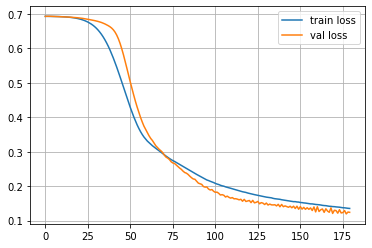

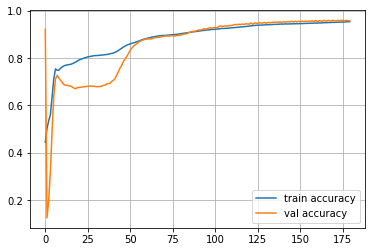

In [13]:
Y_pred = numpy.round(model.predict(X_test))

print(classification_report(Y_test, Y_pred))
print_metrics(confusion_matrix(Y_test, Y_pred), Y_test)
print()
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:\t{:.6f}'.format(score[0]))
print('Test accuracy:\t{:.6f}'.format(score[1]))

plot_loss(history)
plot_accuracy(history)

In [14]:
model.save('MLP_word2vec_SMOTE_variant2')

INFO:tensorflow:Assets written to: MLP_word2vec_SMOTE_variant2/assets
